In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
import plotly.express as px
import random
import sklearn




## Data Class

In [2]:


class Sentiment:
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <=2:
            return Sentiment.NEGATIVE
        elif self.score ==3:
            return Sentiment.NEUTRAL
        else: #Score of 4 or 5
            return Sentiment.POSITIVE
        
class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
        
    def get_sentiment(self):
        return[x.sentiment for x in self.reviews]

    
    def evenly_distribute(self):
        negative =list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive =list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        positive_shrunk = positive[:len(negative)]
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)
    

## Load Data

In [3]:
import json

file_name = 'Books_small_10000.json'

reviews = []

with open (file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))
        
reviews[5].text

'I hoped for Mia to have some peace in this book, but her story is so real and raw.  Broken World was so touching and emotional because you go from Mia\'s trauma to her trying to cope.  I love the way the story displays how there is no "just bouncing back" from being sexually assaulted.  Mia showed us how those demons come for you every day and how sometimes they best you. I was so in the moment with Broken World and hurt with Mia because she was surrounded by people but so alone and I understood her feelings.  I found myself wishing I could give her some of my courage and strength or even just to be there for her.  Thank you Lizzy for putting a great character\'s voice on a strong subject and making it so that other peoples story may be heard through Mia\'s.'

## Prep Data

In [4]:
from sklearn.model_selection import train_test_split

training, test = train_test_split(reviews, test_size=0.33, random_state=42)

train_container = ReviewContainer(training)

test_container = ReviewContainer(test)
train_container.evenly_distribute()
train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))

436
436


## Bag Of Word Vecotorization

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# This book is amazing!
# This book was awful
vectorizer = TfidfVectorizer()
train_x_vectors =vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)



print(train_x[0])
print(train_x_vectors[0].toarray())

Pretty good. Writing sometimes seems directed toward the dime-novel crowd (that is, not terribly sophisticated). Plot is not always very believable. In summary, an OK read, but I was rather disappointed after reading other Turow books.
[[0. 0. 0. ... 0. 0. 0.]]


## Classification

### Linear SVM

In [6]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)

test_x[0]

clf_svm.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

### Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)

clf_dec.predict(test_x_vectors[0])

array(['POSITIVE'], dtype='<U8')

In [8]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)

test_x[0]

clf_svm.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

In [9]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)

test_x[0]

clf_svm.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

### Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = DecisionTreeClassifier()
clf_gnb.fit(train_x_vectors, train_y)

clf_gnb.predict(test_x_vectors[0])

array(['POSITIVE'], dtype='<U8')

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)

clf_dec.predict(test_x_vectors[0])

array(['POSITIVE'], dtype='<U8')

### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, train_y)

clf_log.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

### Evaluation

In [13]:
# Mean Accuracy
print(clf_svm.score(test_x_vectors, test_y))
print(clf_dec.score(test_x_vectors, test_y))
print(clf_gnb.score(test_x_vectors, test_y))
print(clf_log.score(test_x_vectors, test_y))

0.8076923076923077
0.6370192307692307
0.6442307692307693
0.8052884615384616


#### F1 Scores

In [14]:
from sklearn.metrics import f1_score

f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])
#f1_score(test_y, clf_log.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])

C:\Users\silve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


array([0.80582524, 0.        , 0.80952381])

### Qualative Testing

In [15]:
test_set = ["I thoroughly enjoyed this, 5 stars", "bad book do not buy", "horrible waste of time"]
new_test = vectorizer.transform(test_set)

clf_svm.predict(new_test)

array(['POSITIVE', 'NEGATIVE', 'NEGATIVE'], dtype='<U8')

### Tuning our Model (Using Grid Search)

In [16]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C':(1,4,8,16,32)}
svc= svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(train_x_vectors, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})

In [17]:
print(clf.score(test_x_vectors, test_y))

0.8197115384615384


### Saving Model Using Pickle

In [18]:
import pickle

with open ('sentiment_classifier.pkl', 'wb') as f:
    pickle.dump(clf,f)

### Loading Model Using Pickle

In [19]:
with open('sentiment_classifier.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)

In [20]:
print(test_x[0])

loaded_clf.predict(test_x_vectors[0])

First off, is this book destined to become a classic like &#34;The Count Of Monte Cristo&#34;? Probably not.But, what it is, is a well-written, fun story and a continuation of the smaller plot-points in the original. &#34;Sultan of Monte Cristo&#34; follows the Count of Monte Cristo as he becomes the Sultan of Albania (after channeling his inner pirate as Sinbad) and is slowly dealing with the repercussions of his actions in &#34;Count&#34;. Initially worried that the book might take on a &#34;fan-fiction&#34; tone, style, and quality,  I was glad that the book was-well-written, with a tone and style of a professional author, and a well-fleshed-out and -though-out story which I considered high quality. It was obvious from reading it that &#34;Sultan&#34; came from a place of love for the original. I enjoyed reading it, and it was a rather quick read as well, being only about 100 pages. A recommended read.


array(['NEGATIVE'], dtype='<U8')

### Matplotlib for Visual DataFrames

#### Importing my .csv files

In [21]:
#Using a different data frame for this section
df_books = pd.read_csv('books.csv')
df_books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [22]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


#### Merging my DataFrames

In [23]:
df = pd.merge(df_books,df_ratings, on= 'book_id')

### Bar Graph Using matplotlib

#### Pivot table

In [24]:
table = pd.pivot_table(data = df, index = 'authors', values= 'books_count',aggfunc=np.sum)
table

,books_count
authors,
A. Manette Ansay,12375
A. Meredith Walters,4497
"A.A. Milne, Ernest H. Shepard",1018234
A.C. Gaughen,1529
A.G. Howard,7770
...,...
منى المرشود,963
نور عبدالمجيد,279
ياسر حارب,570


#### BarPlot (Not at all optimized for continuous data, just an example)

C:\Users\silve\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26449 (\N{CJK UNIFIED IDEOGRAPH-6751}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\silve\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\silve\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26149 (\N{CJK UNIFIED IDEOGRAPH-6625}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\silve\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27193 (\N{CJK UNIFIED IDEOGRAPH-6A39}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\silve\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26716 (\N{CJK UNIFIED IDEOGRAPH-685C}) missing from current font.
  fig.canvas.print_figure(bytes_

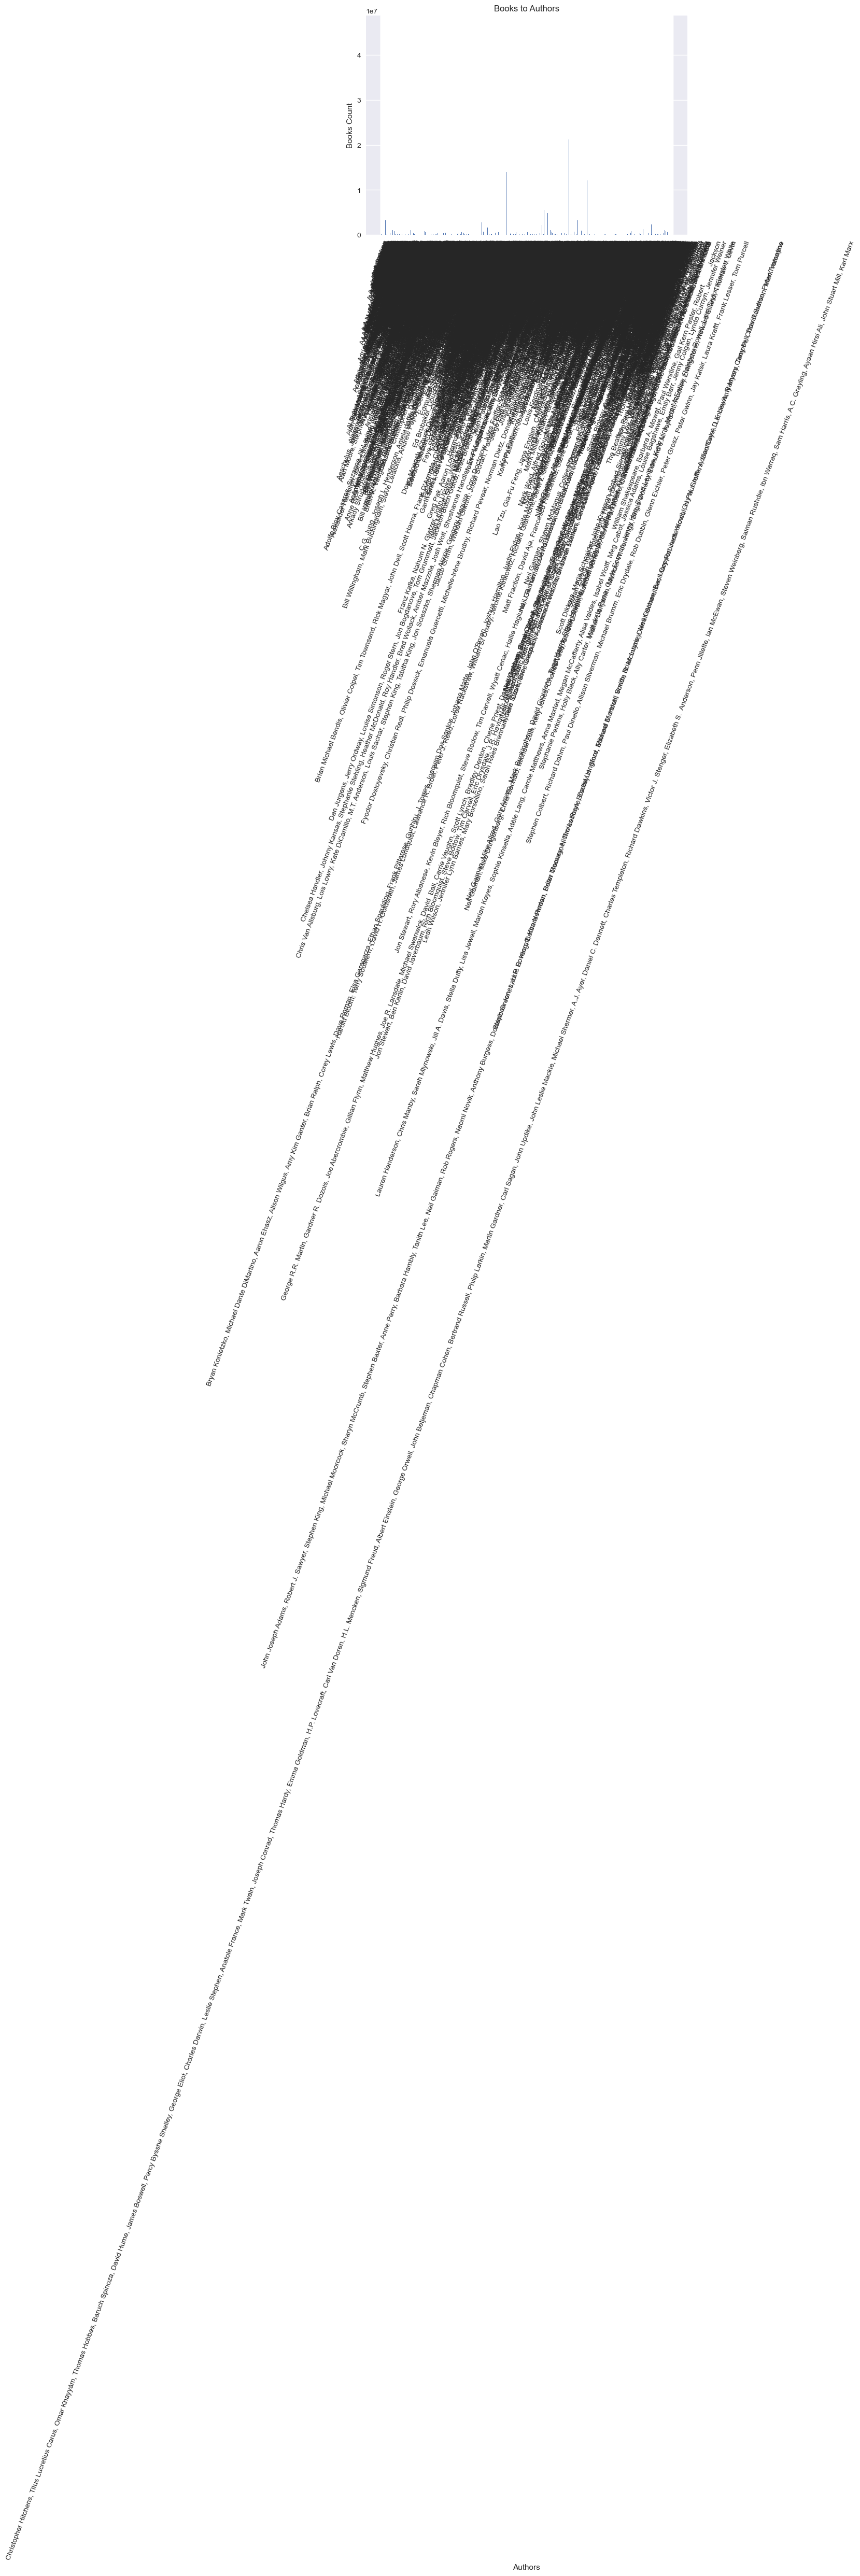

In [25]:
plt.bar(table.index,table['books_count'])
plt.xticks(rotation=70)
plt.xlabel('Authors')
plt.ylabel('Books Count')
plt.title('Books to Authors')
plt.show()

In [26]:
###This is a massive dataframe.
### Bar Graphs are not at all optimized for continuos values
###This is only to show that it can be done. 

### New Pivot Table

In [27]:
table = pd.pivot_table(data = df, index = 'original_publication_year', values= 'books_count',aggfunc=np.sum)
table

,books_count
original_publication_year,
-1750.0,194180
-762.0,192780
-750.0,6444150
-720.0,10730603
-560.0,1458216
...,...
2013.0,11524231
2014.0,7297241
2015.0,4427806


### Defining Plot

In [28]:
t = df['original_publication_year']
v = df['books_count']


Text(0.5, 1.0, 'The relation of Original Publication Year to Book Count.')

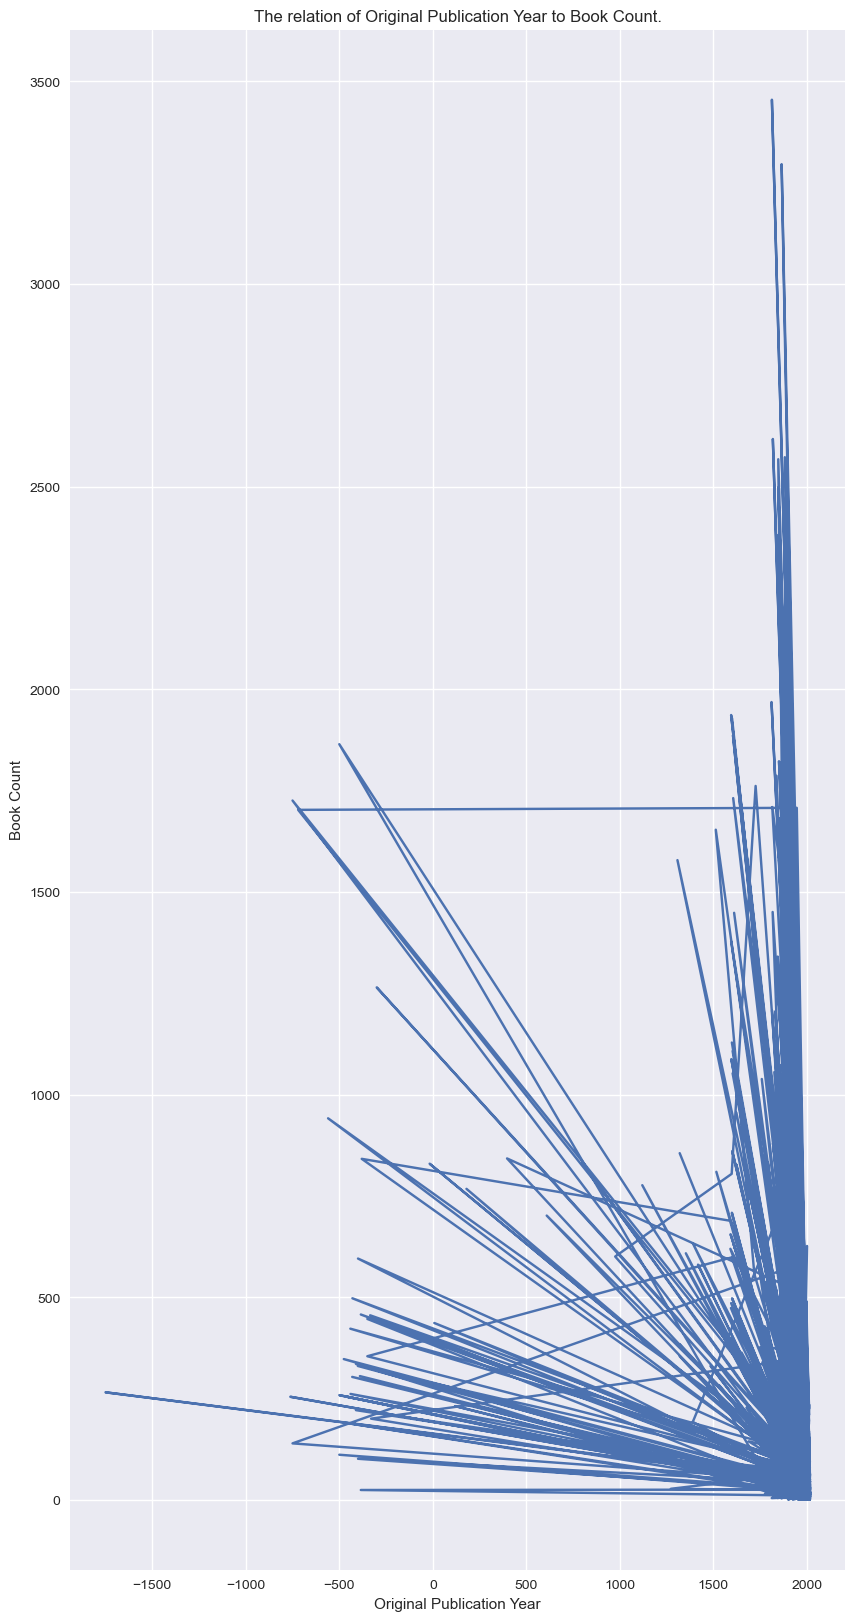

In [29]:
from matplotlib import pyplot as plt

fig,ax = plt.subplots(figsize=(10,20))
ax.plot(t,v)
ax.set_xlabel('Original Publication Year')
ax.set_ylabel('Book Count')
ax.set_title('The relation of Original Publication Year to Book Count.')

### Scatter Plot 

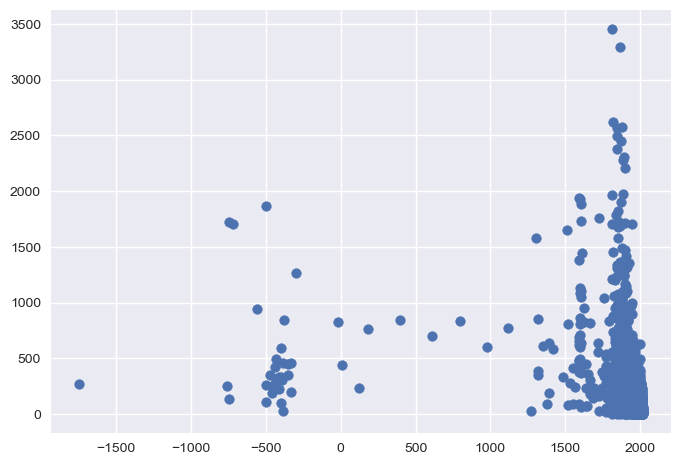

In [30]:
df=pd.read_csv('books.csv')
x = df.original_publication_year
y = df.books_count
plt.scatter(x, y)
plt.show()  

In [31]:
df_books = pd.read_csv('books.csv')
df_books.head(10)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


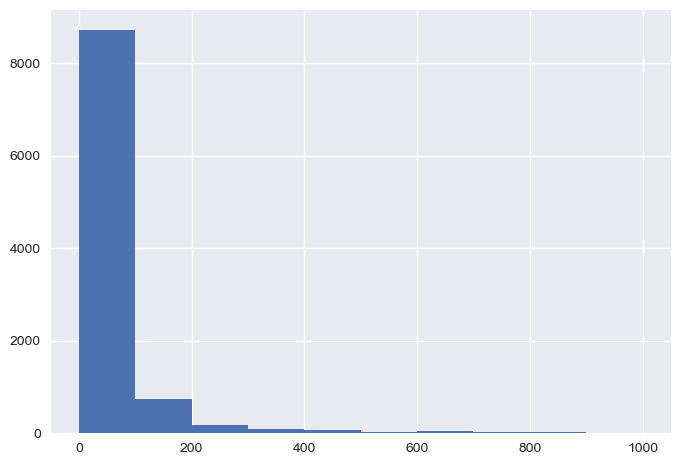

In [32]:
bins = [0,100,200,300,400,500,600,700,800,900,1000]
plt.hist(df_books.books_count, bins = bins)
plt.show()